Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05: Segmentation 2

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 9, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

YOUR ANSWER HERE

## Assignment 1: Edge-based segmentation  [5 Points]

### a) Edge linking

Describe in your own words the idea of edge linking. What is the goal? Why does it not necessarily yield closed
edge contours?

Edge linking can be used to post process edge detection outputs by reconstructing missing edges based on the information of the already found edges. The reconstruction works by searching for edges that lie on a gradient of a specific direction and continue their path until another edge is found.
Since the reconstruction might fail the edges could make no sense or are not closed.

### b) Zero crossings

Explain what zero crossings are. Why does the detection of zero crossings always lead to closed contours?

Zero crossings are the points of the second derivative that connect a signal part with positive second derivative with a negative second derivative.
It always leads to closed contours because of the Zwischenwertsatz.

### c) Zero crossings (implementation)

Provide an implementation of the zero crossing procedure described in (CV-07 slide 71). To get sensible results you should smooth the image before applying the Laplacian filter, e.g. using the Laplacian of a Gaussian (you may use buildin functions for the filterings steps).

/Users/Henning/anaconda/lib/python3.5/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


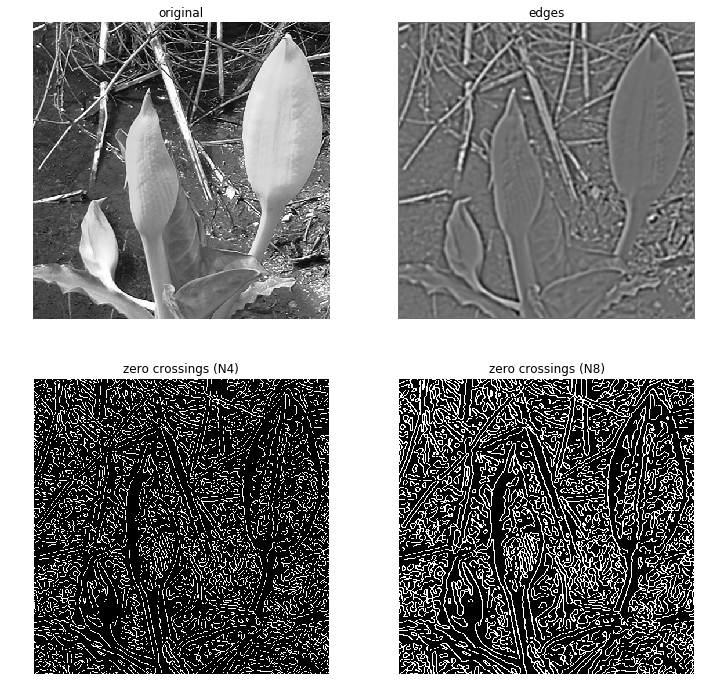

In [10]:
from skimage import filters, io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = io.imread('images/swampflower.png')

# Now compute edges and then zero crossings using the 4-neighborhood and the 8-neighborhood
# YOUR CODE HERE
gauss_img = filters.gaussian_filter(img,3)
lapl_img  = filters.laplace(gauss_img)

shift_x  = np.roll(lapl_img,1,axis=0)
shift_y  = np.roll(lapl_img,1,axis=1)
shift_xy = (np.roll(shift_x,1,axis=1)*lapl_img)<=0
shift_yx = (np.roll(shift_x,-1,axis=1)*lapl_img)<=0

shift_x = (shift_x*lapl_img)<=0
shift_y = (shift_y*lapl_img)<=0

edges = lapl_img
zero_crossings_n4 = (shift_x+shift_y)!=0
zero_crossings_n8 = (shift_x+shift_y+shift_xy+shift_yx)!=0

plt.figure(figsize=(12, 12))
plt.gray()

plt.subplot(2,2,1); plt.axis('off'); plt.imshow(img); plt.title('original')
plt.subplot(2,2,2); plt.axis('off'); plt.imshow(edges); plt.title('edges')
plt.subplot(2,2,3); plt.axis('off'); plt.imshow(zero_crossings_n4); plt.title('zero crossings (N4)')
plt.subplot(2,2,4); plt.axis('off'); plt.imshow(zero_crossings_n8); plt.title('zero crossings (N8)' )

plt.show()

## Assignment 2: Watershed transform  [5 Points]



### a) Watershed transform

Explain in your own words the idea of watershed transform. How do the two different approaches from the lecture work? Why does watershed transform always give a closed contour?



The watershed transform iteratively fills up a landscape with water that is defined by the gradient image. It either floods the region from low values to high values or simulates droplets of water running downhill. When a basin is filled it either merges with other basins or a watershed is found when two large basins get connected.
It always gives a closed contour since the basins will always connect when the largest possible value is reached by the water level.

### b) Implementation

Now implement the watershed transform using the flooding approach (CV-07 slide 76, but note, that the algorithm presented there is somewhat simplified!). Obviously, buildins for computing watershed transform are not allowed, but all other functions may be used. In this example we appply the watershed transform to a distance transformed image, so you **do not** have to take the gradient image, but can apply the watershed transform directly.

(array([0, 1, 2], dtype=uint16), array([2796, 1963,    2]))


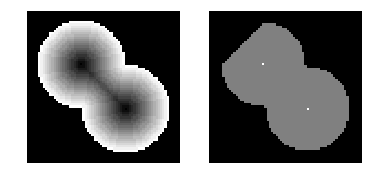

In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage as ski

%matplotlib inline


def watershed(img, step=1):
    """
    Perform watershed transform on a grayscale image.
    
    Args:
        img: The grayscale image.
        step (int): The rise of the waterlevel at each step. Default 1.
        
    Returns:
        A binary image containing the watersheds.
    """


    NO_LABEL = 0
    WATERSHED = 1
    new_label = 2
    
    # initialize labels
    label = np.zeros(img.shape, np.uint16)
    # YOUR CODE HERE
    M,N = img.shape
    h = 0
    count = 0
    while h < np.max(img):
        
        for x in range(M):
            for y in range(N):
            
                n1 = ((x+1)%M, y)
                n2 = (x-1, y)
                n3 = (x, (y+1)%N)
                n4 = (x, y-1)

                if (h >= img[x,y]) and (label[x,y] == NO_LABEL):
        
                    imgn = np.array([img[n1], img[n2], img[n3], img[n4]])
                    labeln = np.array([label[n1], label[n2], label[n3], label[n4]])
                         
                        
                    if imgn.all() > h:
                        label[x,y] = new_label
                        new_label += count
                        count += 1
                        
                    elif np.unique(labeln).shape[0] == 1:
                        
                        label[x,y] = label[n1]
                        
                    else: label[x,y] = WATERSHED
        
        
        
        
        h += 1
    print(np.unique(label, return_counts=True))
#     print(label[0,0])
    return label
                    


img = imageio.imread('images/dist_circles.png', pilmode='L')

plt.gray()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(watershed(img))
plt.show()

### c) Application: maze

You can use watershed transform to find your way through a maze. To do so, first apply a distance transform to the maze and the flood the result. The watershed will show you the way through the maze. Explain why this works.

In [ ]:
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import distance_transform_edt
%matplotlib inline

img = imageio.imread('images/maze2.png', pilmode = 'L') # 'maze1.png' or 'maze2.png'

result = img[:, :, np.newaxis].repeat(3, 2)
# YOUR CODE HERE

plt.figure(figsize=(10, 10))
plt.title('Solution')
plt.axis('off')
plt.gray()
plt.imshow(result)
plt.show()

A flooding starting at the entrance points of the maze, would lead to a watershed , where both flood meet. This helps to connect the two entrances.

## Assignment 3: $k$-means segmentation [5 Points]


**a)** Explain the idea of $k$-means clustering and how it can be used for segmentation.

k-means clustering iteratively updates an estimation of cluster centres based on the current cluster assignment. A point always gets assigned to the closest cluster center.
It can be used for segmentation under the premise that clusters of similar color/texture etc. yield information about the target segmentation.

**b)** Implement k-means clustering for color segmentation of an RGB image (no use of `scipy.cluster.vq.kmeans` or similar functions allowed here, but you may use functions like `numpy.mean`, `scipy.spatial.distance.pdist` and similar utility functions). Stop calculation when center vectors do not change more than a predefined threshold. Avoid empty clusters by re-initializing the corresponding center vector. (Empirically) determine a good value for $k$ for clustering the image 'peppers.png'.
**Bonus** If you want you can visualize the intermediate steps of the clustering process.

First lets take a look at how our image looks in RGB colorspace. 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread('images/peppers.png')
vec = img.reshape((-1, img.shape[2]))
vec_scaled = vec / 255
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ret = ax.scatter(vec[:, 0], vec[:, 1], vec[:, 2], c=vec_scaled, marker='.')

/Users/Henning/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Henning/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


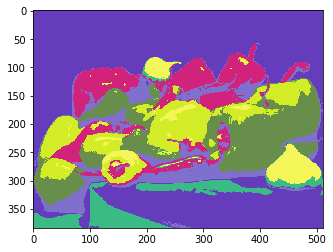

In [88]:
import numpy as np
from scipy.spatial import distance
from IPython import display
from skimage import io
import time
import matplotlib.pyplot as plt
%matplotlib inline


def kmeans_rgb(img, k, threshold=0, do_display=None):
    """
    k-means clustering in RGB space.

    Arguments:
        img (numpy.ndarray): an RGB image
        k (int): the number of clusters
        threshold (float): Maximal change for convergence criterion.
        do_display (bool): Whether or not to plot, intermediate steps.
        
    Result:
        cluster (numpy.ndarray): an array of the same size as `img`,
            containing for each pixel the cluster it belongs to
        centers (numpy.ndarray): an array
    """
    means  = np.random.random((k,3))
    labels = np.zeros(img.shape[:3]) 
    
    while True:
        labels     = np.argmin([np.linalg.norm(img-m,axis=2) for m in means],axis=0)
        new_means  = np.array([np.mean(img[labels==l],axis=0) for l in range(k)])
        new_means[np.isnan(new_means)] = 0
        
        if np.max(np.linalg.norm(new_means-means),axis=0) <= threshold:
            break
        
        means = new_means.copy()
        
        
    return labels,means

            
    


img = io.imread('images/peppers.png')

cluster, centers = kmeans_rgb(img, k=7, threshold=0, do_display=True)

plt.imshow(centers[cluster])
plt.show()


**c)** Now do the same in the HSV space (remember its special topological structure). Check if you can improve the results by ignoring some of the HSV channels.

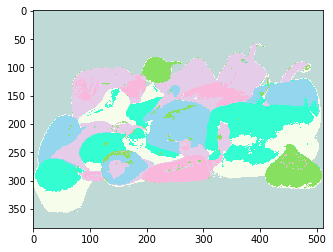

In [108]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
%matplotlib inline
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

img = imageio.imread('images/peppers.png', pilmode = 'RGB')


def vec_hsv(img):
    vimg = np.empty((img.shape[0],img.shape[1],4))
    vimg[...,2:] = img[...,1:]
    vimg[...,0]  = np.sin(img[...,0]*np.pi*2)
    vimg[...,1]  = np.cos(img[...,0]*np.pi*2)
    return vimg
    
    
def kmeans_hsv(img, k, threshold = 0):
    """
    k-means clustering in HSV space.

    Arguments:
        img (numpy.ndarray): an HSV image
        k (int): the number of clusters
        threshold (float): 
        
    Result:
        cluster (numpy.ndarray): an array of the same size as `img`,
            containing for each pixel the cluster it belongs to
        centers (numpy.ndarray): an array
    """
    # YOUR CODE HERE
    means  = np.random.random((k,4))
    labels = np.zeros((img.shape[0],img.shape[1])) 
    
    img = vec_hsv(img)
    
    while True:
        labels     = np.argmin([np.linalg.norm(img-m,axis=2) for m in means],axis=0)
        new_means  = np.array([np.mean(img[labels==l],axis=0) for l in range(k)])
        new_means[np.isnan(new_means)] = 0
                
        if np.max(np.linalg.norm(new_means-means),axis=0) <= threshold:
            break
            
        means = new_means
        
        
    return labels,means
    
    

img_hsv = color.rgb2hsv(img)
k = 7
theta = 0.01

cluster, centers_hsv = kmeans_hsv(img_hsv, k, theta)

plt.imshow(centers_hsv[cluster])
plt.show()


## Assignment 4: Interactive Region Growing [5 Points]

Implement flood fill as described in (CV07 slides 123ff.).


The function `on_press` is called when a mouse button is pressed inside the canvas. From there call `floodfill`. Use the filtered hsv image `img_filtered` for your computation, and show the computed region around the seed point (the position where the mousebutton was pressed) in the original image. You may use a mask to save which pixels belong the the region (and to save which pixels you already visited). 

Hint: If you can not see the image, try restarting the kernel.

<IPython.core.display.Javascript object>


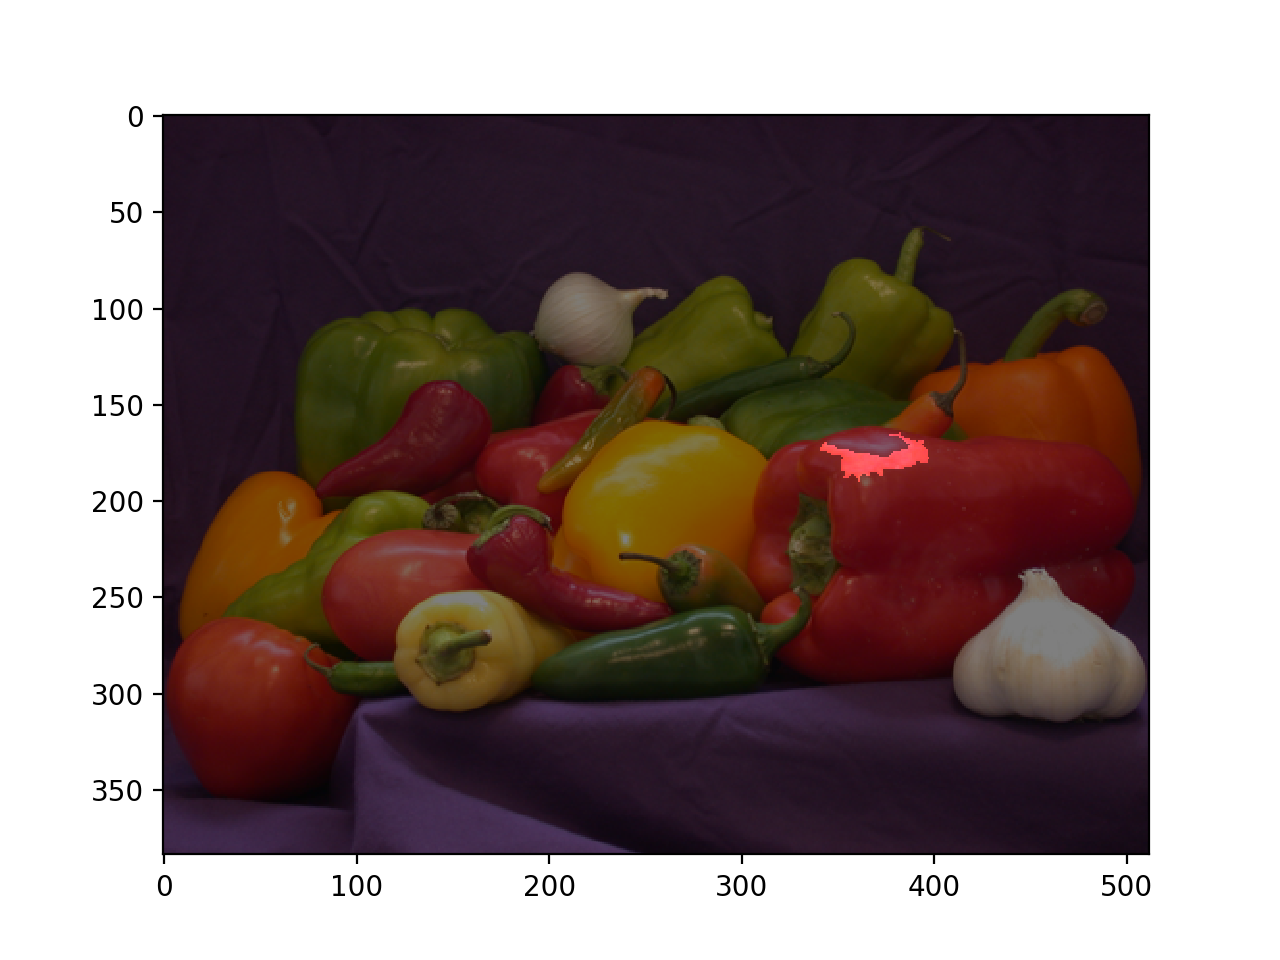

In [83]:
%matplotlib notebook
import imageio
import math
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
import scipy.ndimage as ndimage
from sys import setrecursionlimit

threshold = 23.0;

setrecursionlimit(10000)

def vec(a):
    return np.array([np.sin(np.pi*2*a[0]),np.cos(np.pi*2*a[0]),a[1],a[2]])


def floodfill(img, mask, x, y, color):
    """Recursively grows region around seed point
    
    Args: 
        img: The image in which the region is grown
        mask: Boolean ndarray in which visited pixels which belong to the
                region are saved
        x: X coordinate of the pixel. Checks if this pixels belongs to the region
        y: Y coordinate of the pixel.
        color: The color at the seed position
    """
    if x<img.shape[0] and y<img.shape[1] and mask[x,y] == False:
        mean = np.mean([vec(v) for v in img[mask==True]],axis=0)
        if np.linalg.norm(vec(img[x,y])-mean) < threshold:
            mask[x,y] = True
            floodfill(img,mask,x+1,y,img[x,y])
            floodfill(img,mask,x-1,y,img[x,y])
            floodfill(img,mask,x,y+1,img[x,y])
            floodfill(img,mask,x,y-1,img[x,y])

def on_press(event):
    """Mouse button press event handler
    
    Args:
        event: The mouse event
    """
    y = math.floor(event.xdata)
    x = math.floor(event.ydata)
    color = img_filtered[x, y, :]

    
    plt.imshow(img)
    fig.canvas.draw()
            

img = imageio.imread('images/peppers.png')
img_hsv = color.rgb2hsv(img)
img_filtered = ndimage.median_filter(img_hsv, 5)

"""
fig = plt.figure()
ax = fig.add_subplot(111)

"""
x,y = 180,360

mask = np.zeros(img.shape[:2],dtype=np.bool)
mask[x,y] = True
floodfill(img,mask,x+1,y,img[x,y])

#fig.canvas.mpl_connect('button_press_event', on_press)

img[mask==False] //= 2

plt.imshow(img)
plt.show()
